In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [30]:
plt.style.use('seaborn')

## Data Preparation

In probability theory and statistics, a covariance matrix (also known as auto-covariance matrix, dispersion matrix, variance matrix, or variance–covariance matrix) is a square matrix giving the covariance between each pair of elements of a given random vector. In the matrix diagonal there are variances, i.e., the covariance of each element with itself.

Intuitively, the covariance matrix generalizes the notion of variance to multiple dimensions. As an example, the variation in a collection of random points in two-dimensional space cannot be characterized fully by a single number, nor would the variances in the {\displaystyle x}x and {\displaystyle y}y directions contain all of the necessary information; a {\displaystyle 2\times 2}2\times 2 matrix would be necessary to fully characterize the two-dimensional variation.

In [31]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

In [32]:
print(mean_01)

[1.  0.5]


In [33]:
print(cov_01)

[[1.  0.1]
 [0.1 1.2]]


In [34]:
mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])

The multivariate normal, multinormal or Gaussian distribution is a generalization of the one-dimensional normal distribution to higher dimensions. Such a distribution is specified by its mean and covariance matrix. These parameters are analogous to the mean (average or “center”) and variance (standard deviation, or “width,” squared) of the one-dimensional normal distribution.

Parameters:	
mean : 1-D array_like, of length N
Mean of the N-dimensional distribution.

cov : 2-D array_like, of shape (N, N)
Covariance matrix of the distribution. It must be symmetric and positive-semidefinite for proper sampling.

size : int or tuple of ints, optional
Given a shape of, for example, (m,n,k), m*n*k samples are generated, and packed in an m-by-n-by-k arrangement. Because each sample is N-dimensional, the output shape is (m,n,k,N). If no shape is specified, a single (N-D) sample is returned.

check_valid : { ‘warn’, ‘raise’, ‘ignore’ }, optional
Behavior when the covariance matrix is not positive semidefinite.

tol : float, optional
Tolerance when checking the singular values in covariance matrix. cov is cast to double before the check.

Returns:	
out : ndarray
The drawn samples, of shape size, if that was provided. If not, the shape is (N,).

In other words, each entry out[i,j,...,:] is an N-dimensional value drawn from the distribution.

In [35]:
# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

In [36]:
print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


## Data Visualisation

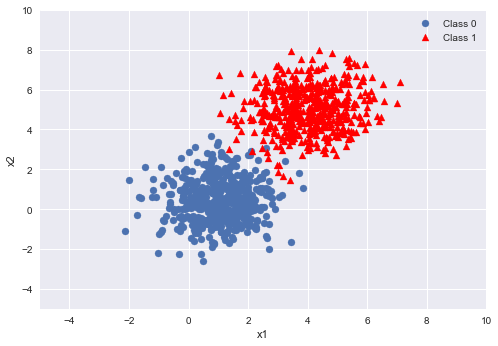

In [37]:
plt.figure()

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

## Create Training and Test Set

In [38]:
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [39]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [40]:
np.random.shuffle(data)
print(data[:10])

[[ 1.96842397  0.97800511  0.        ]
 [ 2.21382991 -0.02505037  0.        ]
 [ 0.02137265  2.88252624  0.        ]
 [-0.83549231 -0.60596564  0.        ]
 [ 4.04553506  5.11714139  1.        ]
 [ 3.62686025  6.60110005  1.        ]
 [ 1.83417269  0.45959156  0.        ]
 [ 2.54373725  6.02078626  1.        ]
 [ 2.55492442  5.75042588  1.        ]
 [ 0.1663358   1.30181865  0.        ]]


In [41]:
split = int(0.8*data.shape[0])

In [42]:
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


## Logistic Regression Functions

In [43]:
def hypothesis(x,w,b):
    '''accepts input vector x, input weight vector w and bias b'''
    
    h = np.dot(x,w) + b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def error(y_true,x,w,b):
    
    m = x.shape[0]
    
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b) 
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
        
    
    return -err/m
def get_grads(y_true,x,w,b):
    
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i] - hx)*x[i]
        grad_b +=  (y_true[i]-hx)#*x[0] its always one be have not introduce
        #this time
        
    
    grad_w /= m
    grad_b /= m
    
    return [grad_w,grad_b]
# One Iteration of Gradient Descent
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    
    err = error(y_true,x,w,b)
    [grad_w,grad_b] = get_grads(y_true,x,w,b)
    
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err,w,b
    
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]
        
    
    

In [44]:
loss = []
acc = []

W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [45]:
for i in range(1000):
    l,W,b = grad_descent(X_train,Y_train,W,b,learning_rate=0.1)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)

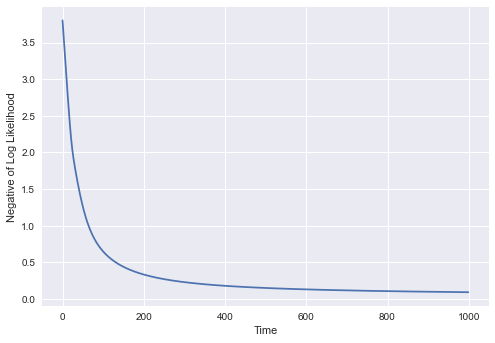

In [46]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

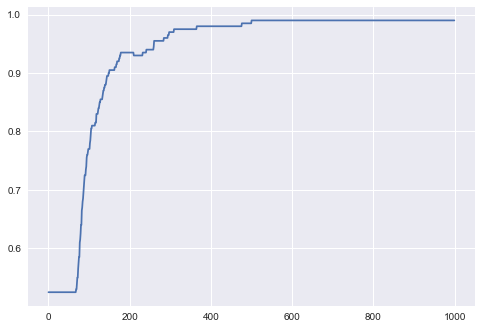

0.99


In [47]:
plt.plot(acc)
plt.show()
print(acc[-1])

## Decision Boundary

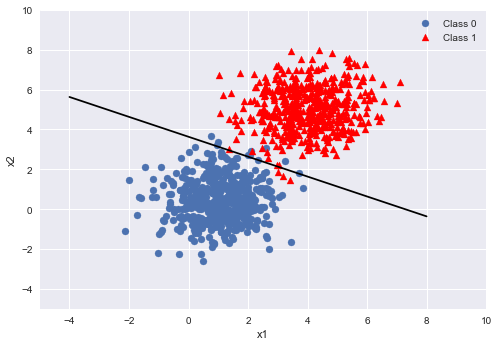

In [48]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(W[0]*x + b)/W[1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()

In [49]:
print(W)
print(b)

[0.63497072 1.27199993]
-4.6189618883366546


In [50]:
np.random.multivariate_normal?


In [51]:
np.linspace?